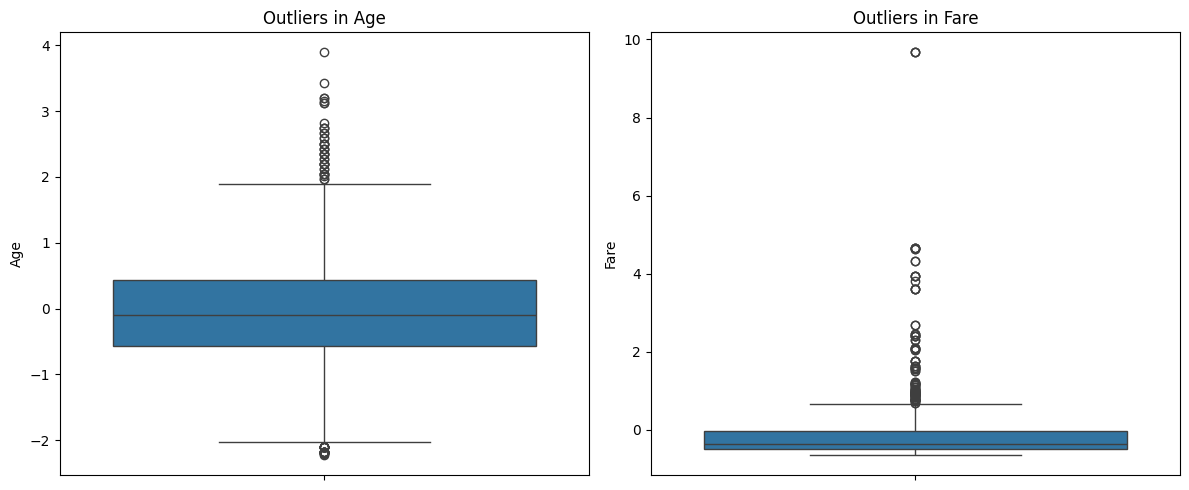

Data shape after removing outliers: (718, 12)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\smart\Downloads\archive (2)\Titanic-Dataset.csv",encoding='utf-8')
print(df.head())             
print(df.info())             
print(df.describe())        
print(df.isnull().sum())     

df.drop('Cabin', axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(df.isnull().sum())
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df.head())
print(df.columns)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df[['Age', 'Fare']].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Outliers in Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Outliers in Fare")

plt.tight_layout()
plt.show()

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df = df[(df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 * IQR_age)]

Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
df = df[(df['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (df['Fare'] <= Q3_fare + 1.5 * IQR_fare)]

print("Data shape after removing outliers:", df.shape)

df.to_csv("cleaned_titanic.csv", index=False)










